<a href="https://colab.research.google.com/github/mingyung-park/2023-2ML-Team-JARVIS/blob/refactor/tutorial_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [For Colaboratory]
1. mount google drive to get raw data
- or you can upload your data directly to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. clone github repository

In [ ]:
import shutil

shutil.rmtree('/content/2023-2ML-Team-JARVIS')

In [ ]:
!git clone --branch refactor https://github.com/mingyung-park/2023-2ML-Team-JARVIS

Cloning into '2023-2ML-Team-JARVIS'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 56 (delta 22), reused 26 (delta 6), pack-reused 0
Receiving objects: 100% (56/56), 292.69 KiB | 5.42 MiB/s, done.
Resolving deltas: 100% (22/22), done.


---

# Set directory path
- change following path if you need

In [ ]:
# where cloned repository located
GIT_REPO_PATH = "/content/2023-2ML-Team-JARVIS"
# GIT_REPO_PATH = "."

# where raw data located
RAW_DATA_DIRECTORY = "/content/drive/MyDrive"
# RAW_DATA_DIRECTORY = "./data"


import os
os.chdir(GIT_REPO_PATH)

- add path to import modules

In [ ]:
import sys
sys.path.append(f"{GIT_REPO_PATH}/code")

import preprocessing, commonUtils, evaluation

- process raw data
- save in pickle file

# Extract feature from raw data

In [ ]:
preprocessing.parse_raw_data(
    monitored_path=f"{RAW_DATA_DIRECTORY}/mon_standard.pkl",
    unmonitored_path=f"{RAW_DATA_DIRECTORY}/unmon_standard10.pkl",
)

Loading datafile... : /content/drive/MyDrive/mon_standard.pkl
Done.

Loading datafile... : /content/drive/MyDrive/unmon_standard10.pkl
Done.

parsing dataset...
Done.



# training model

- tree model

In [ ]:
import models.tree as treeModel
df = preprocessing.process_data(
    config_path=treeModel.RandomForest.config_path, path_to_save="./data/default.pkl"
)

df_no_seq = preprocessing.process_data(
    config_path=treeModel.RandomForestNoSeq.config_path, path_to_save="./data/only-categorical.pkl"
)

Loading datafile... : ./data/original/timestamps.pkl
Done.

Loading datafile... : ./data/original/directions.pkl
Done.

Loading datafile... : ./data/original/label.pkl
Done.

extracting features...
Done.

Loading datafile... : ./data/original/timestamps.pkl
Done.

Loading datafile... : ./data/original/directions.pkl
Done.

Loading datafile... : ./data/original/label.pkl
Done.

extracting features...
Done.



- choose data to use
    - "CM": closed multi label
    - "OM": open multi label
    - "OB": open binary label

In [ ]:
train_x, test_x, train_y, test_y = preprocessing.filter_dataset(df=df, mode="OM")
ns_train_x, ns_test_x, ns_train_y, ns_test_y = preprocessing.filter_dataset(
    df=df_no_seq, mode="OM"
)

- or you can use saved dataset

In [ ]:
train_x, test_x, train_y, test_y = preprocessing.filter_dataset(
    data_path="./data/default.pkl", mode="OM"
)
ns_train_x, ns_test_x, ns_train_y, ns_test_y = preprocessing.filter_dataset(
    data_path="./data/only-categorical.pkl", mode="OM"
)

Loading datafile... : ./data/default.pkl
Done.

Loading datafile... : ./data/only-categorical.pkl
Done.



- train model

In [ ]:
import models.tree as treeModel

tree = treeModel.RandomForest()
tree.fit(train_x, train_y)

tree_no_seq = treeModel.RandomForestNoSeq()
tree_no_seq.fit(ns_train_x, ns_train_y)

RandomForestClassifier(n_estimators=5)

- save model

In [ ]:
!mkdir -p ./result/models
tree.save_model("./result/models/tree.pkl")
tree_no_seq.save_model("./result/models/nstree.pkl")

saving models...: ./result/models/tree.pkl
Done.

saving models...: ./result/models/nstree.pkl
Done.



# evaluate model

### visualize confusion matrix

Loading datafile... : ./result/models/tree.pkl
Done.



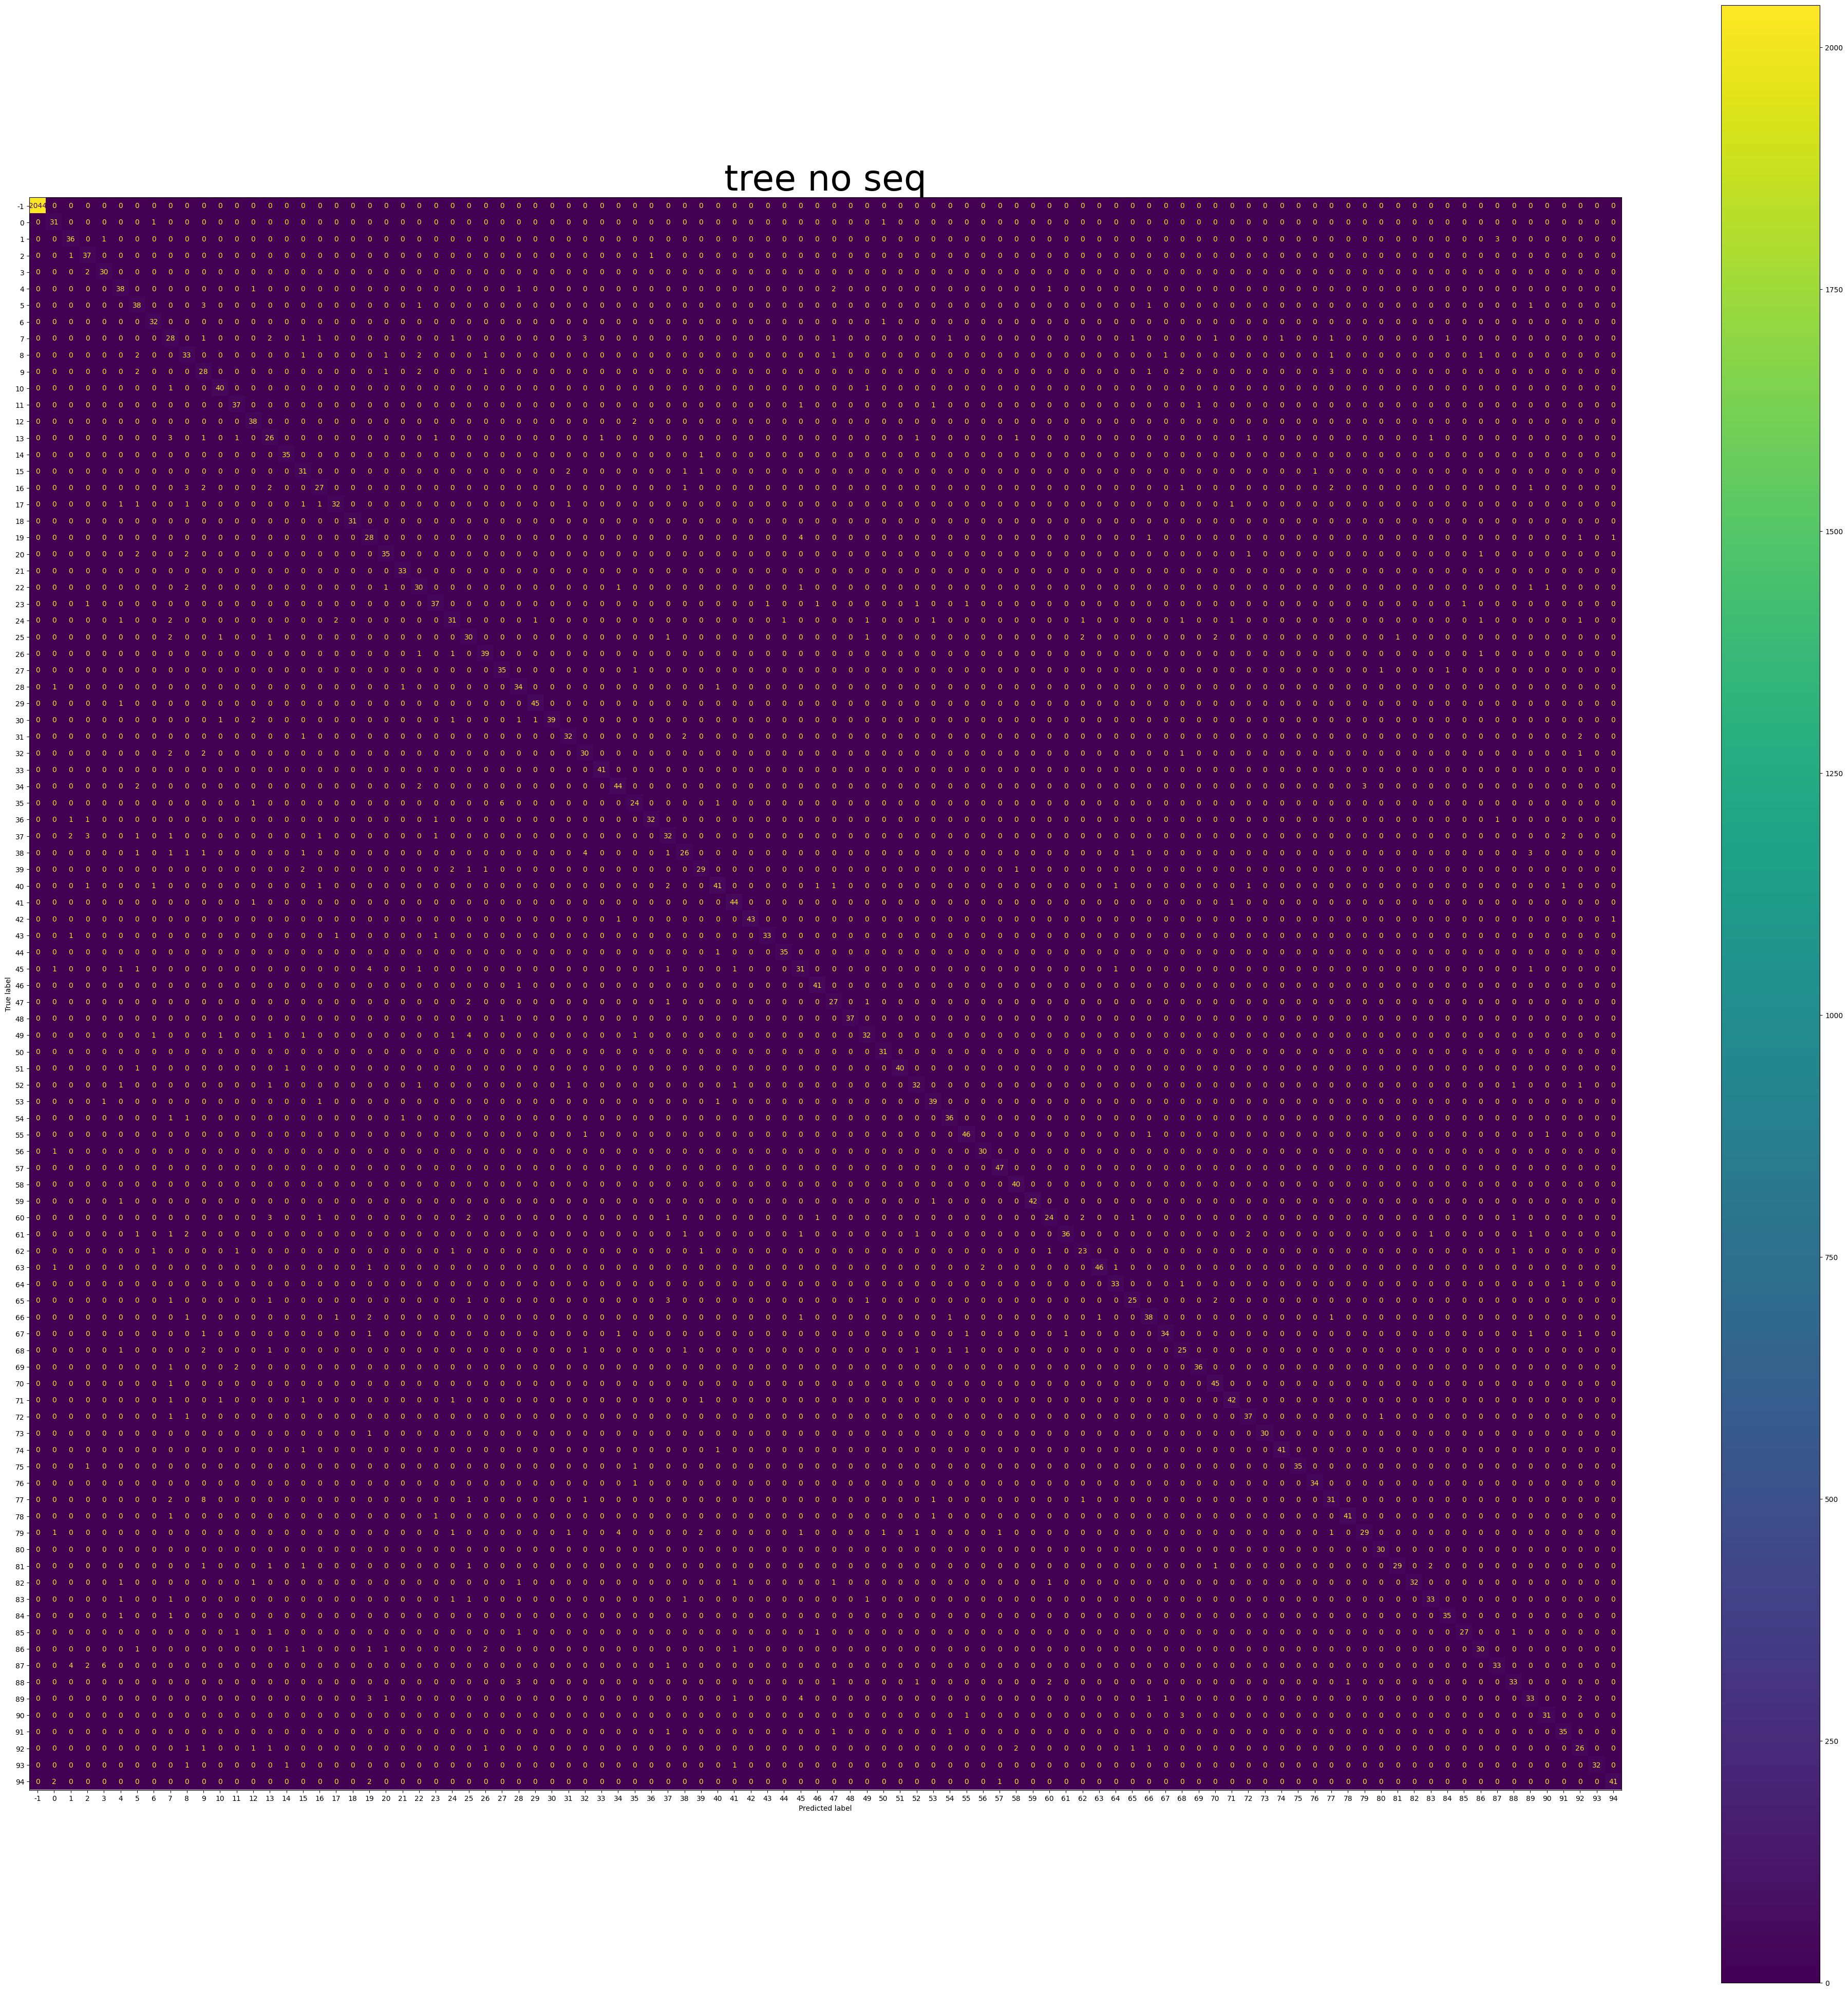

In [ ]:
evaluation.show_confusion_matrix(test_x, test_y, title="tree no seq", model_path="./result/models/tree.pkl")

- or you can use saved model

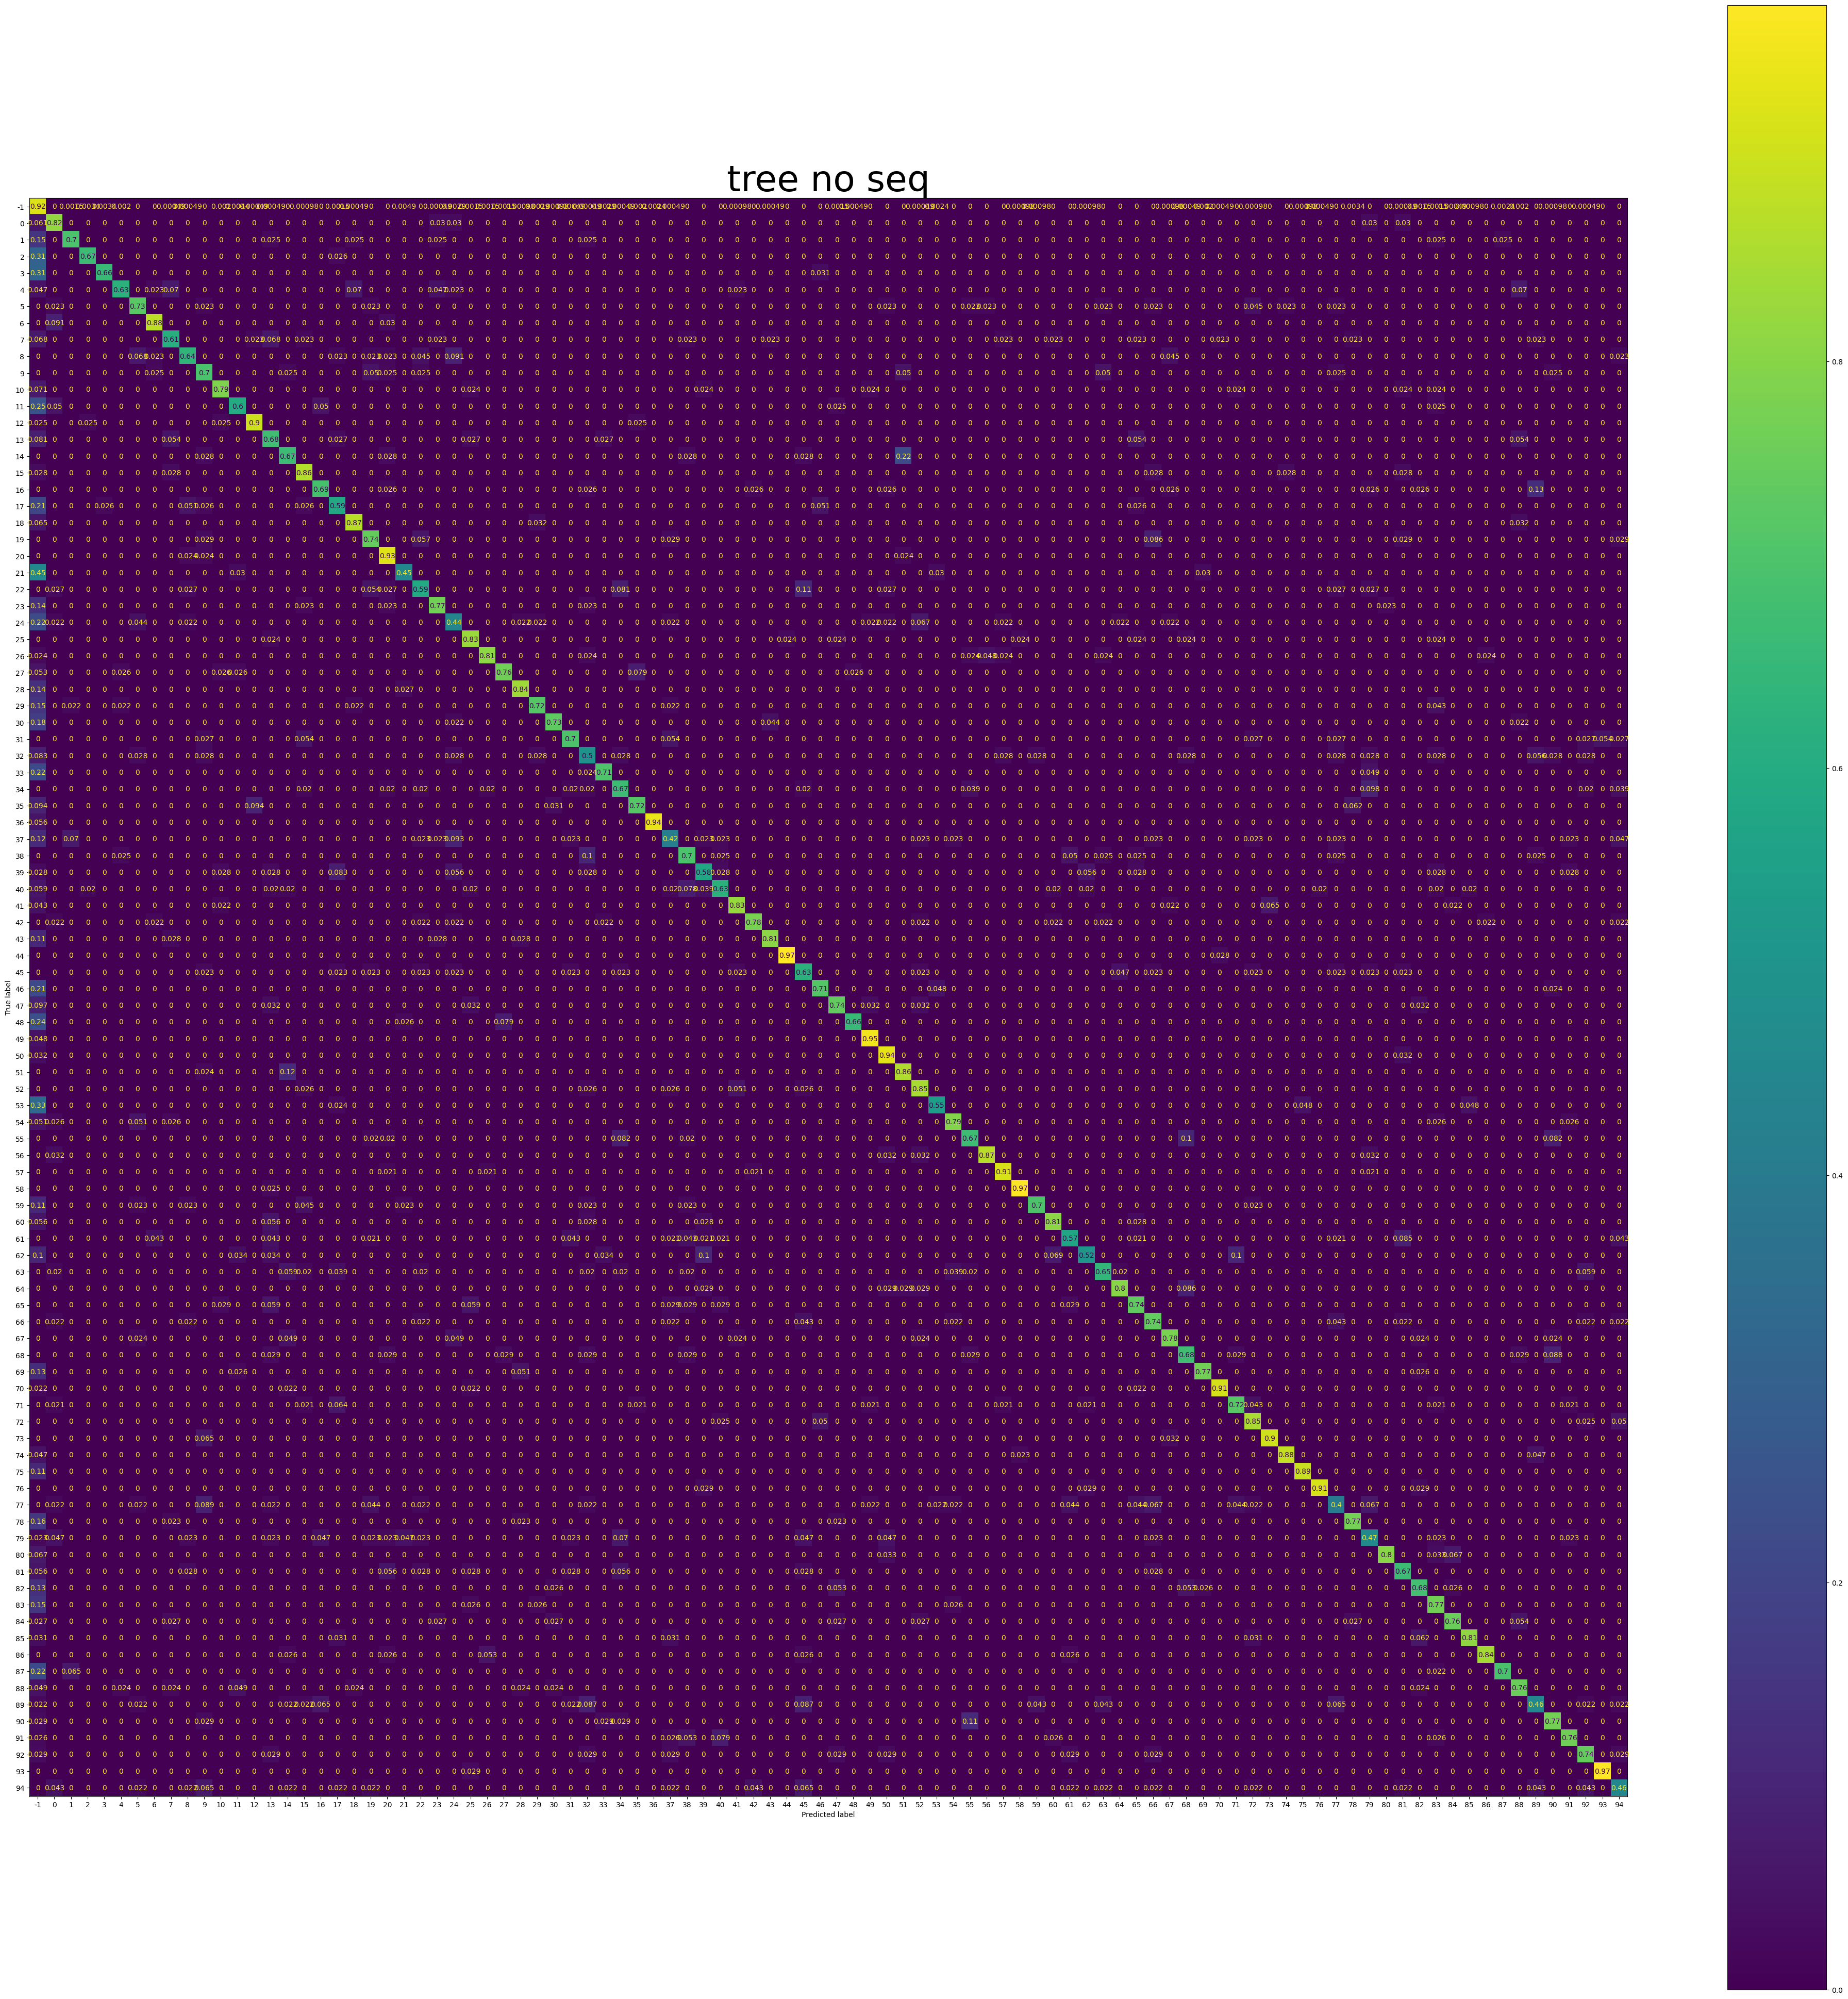

In [ ]:
evaluation.show_confusion_matrix(ns_test_x, ns_test_y, title="tree no seq", model=tree_no_seq, normalize='true')

### comparing multiple model

Model Evaluation for tree - accuracy: 0.9121
Model Evaluation for tree - precision: 0.9157
Model Evaluation for tree - recall: 0.9121
Model Evaluation for tree - f1: 0.9124
Model Evaluation for tree-no seq - accuracy: 0.7974
Model Evaluation for tree-no seq - precision: 0.7974
Model Evaluation for tree-no seq - recall: 0.7974
Model Evaluation for tree-no seq - f1: 0.7950


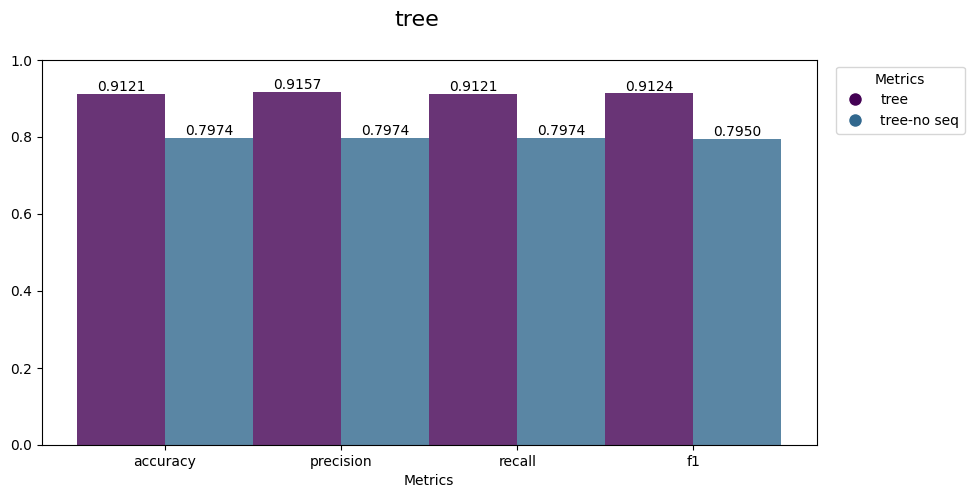

In [ ]:
models = [tree, tree_no_seq]
datasets = [(test_x, test_y), (ns_test_x, ns_test_y)]
names = ["tree", "tree-no seq"]
evaluation.compare_scores(names, datasets, title='tree', models=models)

Loading datafile... : ./result/models/tree.pkl
Done.

Loading datafile... : ./result/models/nstree.pkl
Done.

Model Evaluation for tree - accuracy: 0.9121
Model Evaluation for tree - precision: 0.9157
Model Evaluation for tree - recall: 0.9121
Model Evaluation for tree - f1: 0.9124
Model Evaluation for tree-no seq - accuracy: 0.7974
Model Evaluation for tree-no seq - precision: 0.7974
Model Evaluation for tree-no seq - recall: 0.7974
Model Evaluation for tree-no seq - f1: 0.7950


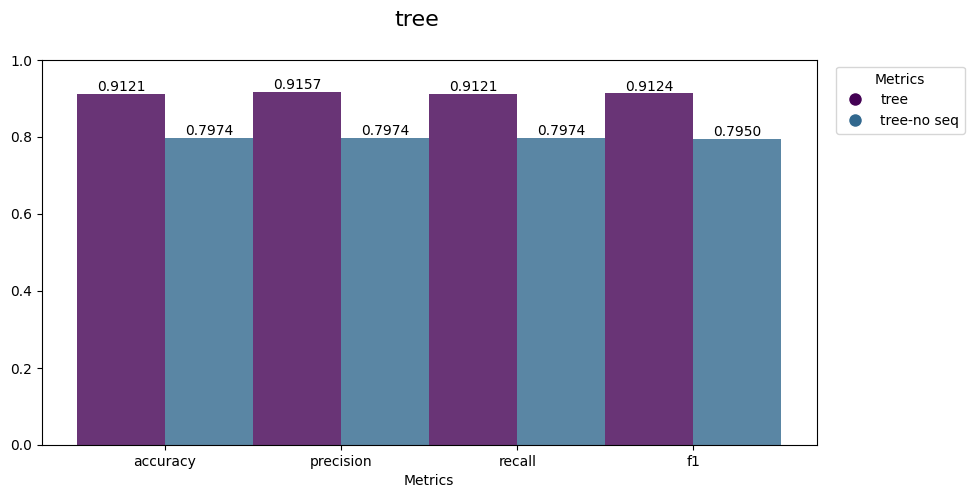

In [ ]:
model_paths = ["./result/models/tree.pkl", "./result/models/nstree.pkl"]
datasets = [(test_x, test_y), (ns_test_x, ns_test_y)]
names = ["tree", "tree-no seq"]
evaluation.compare_scores(names, datasets, title='tree', model_paths=model_paths)